In [1]:
import gc
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
tqdm.pandas(desc='pandas bar')
pd.set_option('display.max_columns', None)

In [2]:
df_train = pd.read_pickle('data/original/train.pkl')
df_test = pd.read_pickle('data/original/test_A.pkl')
df_train.head()

,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d
0,0,1919789,7320,6624,2,244,75,4,19,13,37,3,21,5,214,3,117,680,9,4,2,38,6,2,0,12,35,3,18,-1,-1,6,4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^2...,11,45,7
1,0,3712854,3211,4703,2,168,72,4,19,82,37,3,21,7,403,5,108,200,7,2,2,28,6,2,0,12,34,2,-1,-1,-1,6,2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^...,12,45,6
2,0,1097359,6133,7773,8,282,18,4,13,24,19,2,11,4,140,2,243,296,7,4,2,22,21,2,0,12,29,3,20,-1,-1,8,3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20...,11,24,5
3,0,1762458,6505,5605,2,230,16,4,12,38,37,3,21,7,371,5,243,296,9,2,2,41,6,2,0,12,29,3,-1,-1,-1,6,7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,45,5
4,0,2977228,2820,8320,2,230,16,4,13,38,37,3,21,6,128,3,328,130,9,4,2,24,6,2,0,14,41,2,20,1,-1,5,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,12,45,1


In [3]:
df_train.shape

(60000000, 36)

In [4]:
df_test.shape

(2000000, 36)

测试集新老用户占比

In [5]:
uid_test = set(df_test.uid.unique())
uid_train = set(df_train.uid.unique())
len(uid_test-uid_train) / len(uid_test)

0.24485488588793722

In [11]:
len(uid_test-uid_train)

195713

In [6]:
len(uid_test)

799302

In [7]:
len(uid_train)

2498100

测试集新老广告占比

In [8]:
task_test = set(df_test.task_id.unique())
task_train = set(df_train.task_id.unique())
len(task_test-task_train) / len(task_test)

0.1323283082077052

In [12]:
len(task_test-task_train)

553

In [9]:
len(task_test)

4179

In [10]:
len(task_train)

6033

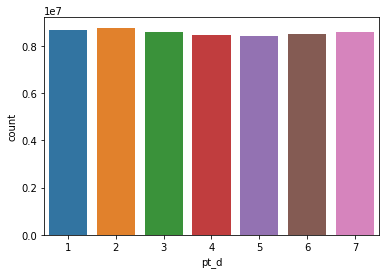

In [5]:
sns.countplot(df_train.pt_d)

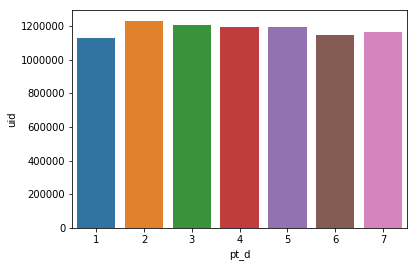

In [6]:
tmp = df_train.groupby('pt_d').uid.agg('nunique')
sns.barplot(x=tmp.index, y=tmp)

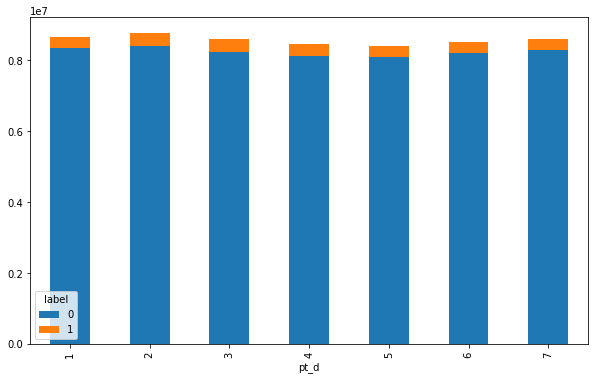

In [7]:
day_df = df_train.groupby(['pt_d', 'label'])['pt_d'].count().unstack('label').fillna(0)
day_df[[0, 1]].plot(kind='bar', stacked=True, figsize=(10,6))

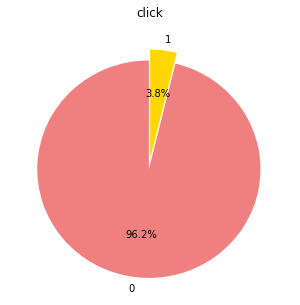

In [8]:
labels = [0,1]
sizes = df_train.label.value_counts().values
explode=[0.1,0]
colors = ['lightcoral','gold']
plt.figure(figsize=(5, 5))
patches, texts,autotexts= plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", startangle=90)
plt.title("click")
plt.show()

In [9]:
df_train.head()

,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d
0,0,1919789,7320,6624,2,244,75,4,19,13,37,3,21,5,214,3,117,680,9,4,2,38,6,2,0,12,35,3,18,-1,-1,6,4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^2...,11,45,7
1,0,3712854,3211,4703,2,168,72,4,19,82,37,3,21,7,403,5,108,200,7,2,2,28,6,2,0,12,34,2,-1,-1,-1,6,2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^...,12,45,6
2,0,1097359,6133,7773,8,282,18,4,13,24,19,2,11,4,140,2,243,296,7,4,2,22,21,2,0,12,29,3,20,-1,-1,8,3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20...,11,24,5
3,0,1762458,6505,5605,2,230,16,4,12,38,37,3,21,7,371,5,243,296,9,2,2,41,6,2,0,12,29,3,-1,-1,-1,6,7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,45,5
4,0,2977228,2820,8320,2,230,16,4,13,38,37,3,21,6,128,3,328,130,9,4,2,24,6,2,0,14,41,2,20,1,-1,5,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,12,45,1


In [18]:
del df_train['communication_onlinerate']

In [19]:
df_train.shape

(60000000, 35)

In [20]:
name_cols = ['标签', '用户', '广告', '广告素材', '素材创意类型', '广告主', '广告开发者', '素材交互类型', '广告位', '广告投放应用', '应用标签', 
             '应用一级分类', '应用二级分类', '用户年龄', '用户城市', '用户城市等级', '用户手机类型',
             '手机尺寸', '用户职业', '用户性别', '网络状态', '用户省份', '应用存储大小', '应用上架时间', '应用评分', 'EMUI版本',
             '手机上市时间', '手机价格', '华为账号时长', '华为会员级别', '会员时长', '付费用户', '手机日在线时长', '广告行业', '日期']

In [21]:
type_cols = ['标签', '用户信息', '广告信息', '广告信息', '广告信息', '广告信息', '广告信息', '广告信息', '媒体信息',
             '媒体信息', '媒体信息', '媒体信息', '媒体信息', '用户信息', '用户信息', '用户信息', '上下文信息',
             '上下文信息', '用户信息', '用户信息', '上下文信息', '用户信息', '媒体信息', '媒体信息', '媒体信息', '上下文信息',
             '上下文信息', '上下文信息', '用户信息', '用户信息', '用户信息', '用户信息', '用户信息', '广告信息', '日期']

In [22]:
tmp = pd.DataFrame()
tmp['feats'] = df_train.columns
tmp['type'] = type_cols
tmp['name'] = name_cols
tmp['nunique'] = df_train.nunique().values
tmp['missing'] = ((df_train == -1).sum() / df_train.shape[0]).values * 100
tmp['max_count_value'] = [df_train[col].value_counts().idxmax() for col in df_train.columns]
tmp['max_count_prop'] = [df_train[col].value_counts().values[0] / df_train.shape[0] for col in df_train.columns]
tmp['max_value'] = [df_train[col].max() for col in df_train.columns]
tmp['min_value'] = [df_train[col].min() for col in df_train.columns]
tmp.set_index(['type','name', 'feats']).sort_index()

nunique    missing  \
type  name    feats                                             
上下文信息 EMUI版本  emui_dev                          24   0.000000   
      手机上市时间  list_time                         42   0.261613   
      手机价格    device_price                       8   0.261613   
      手机尺寸    device_size                      619   0.000000   
      用户手机类型  device_name                      230   0.000000   
      网络状态    net_type                           6   0.000000   
媒体信息  广告位     slot_id                           13   0.000000   
      广告投放应用  spread_app_id                     80   0.000000   
      应用一级分类  app_first_class                    3   0.000000   
      应用上架时间  his_on_shelf_time                  3  14.629417   
      应用二级分类  app_second_class                  18   0.000000   
      应用存储大小  his_app_size                      21  14.629417   
      应用标签    tags                              34   0.000000   
      应用评分    app_score                          1   0.000000   
广告信息  广告      task_id                         6033   0.000000   
      广告主     adv_prim_id                      173   0.000000   
      广告开发者   dev_id                            64   0.000000   
      广告素材    adv_id                          6376   0.000000   
      广告行业    indu_name                         36   0.000000   
      素材交互类型  inter_type_cd                      4   0.000000   
      素材创意类型  creat_type_cd                      8   0.000000   
日期    日期      pt_d                               7   0.000000   
标签    标签      label                              2   0.000000   
用户信息  付费用户    consume_purchase                   9   0.000000   
      会员时长    membership_life_duration          21  99.917100   
      华为会员级别  up_membership_grade                4  89.530533   
      华为账号时长  up_life_duration                  21  29.642373   
      手机日在线时长 communication_avgonline_30d       14   0.314140   
      用户      uid                          2498100   0.000000   
      用户城市    city                             344   0.000000   
      用户城市等级  city_rank                          4   0.000000   
      用户年龄    age                                8   0.259698   
      用户性别    gender                             3   0.000000   
      用户省份    residence                         37   0.000000   
      用户职业    career                             9   0.000000   

                                           max_count_value  max_count_prop  \
type  name    feats                                                          
上下文信息 EMUI版本  emui_dev                                  12        0.562324   
      手机上市时间  list_time                                 38        0.160322   
      手机价格    device_price                               4        0.272473   
      手机尺寸    device_size                              296        0.377741   
      用户手机类型  device_name                              286        0.050966   
      网络状态    net_type                                   2        0.604084   
媒体信息  广告位     slot_id                                   13        0.250517   
      广告投放应用  spread_app_id                             95        0.137321   
      应用一级分类  app_first_class                            3        0.843559   
      应用上架时间  his_on_shelf_time                          2        0.852170   
      应用二级分类  app_second_class                          15        0.273051   
      应用存储大小  his_app_size                               6        0.248428   
      应用标签    tags                                      24        0.232472   
      应用评分    app_score                                  0        1.000000   
广告信息  广告      task_id                                 1647        0.009222   
      广告主     adv_prim_id                              215        0.053592   
      广告开发者   dev_id                                    72        0.231454   
      广告素材    adv_id                                  2663        0.009222   
      广告行业    indu_name                                 45        0.401551   

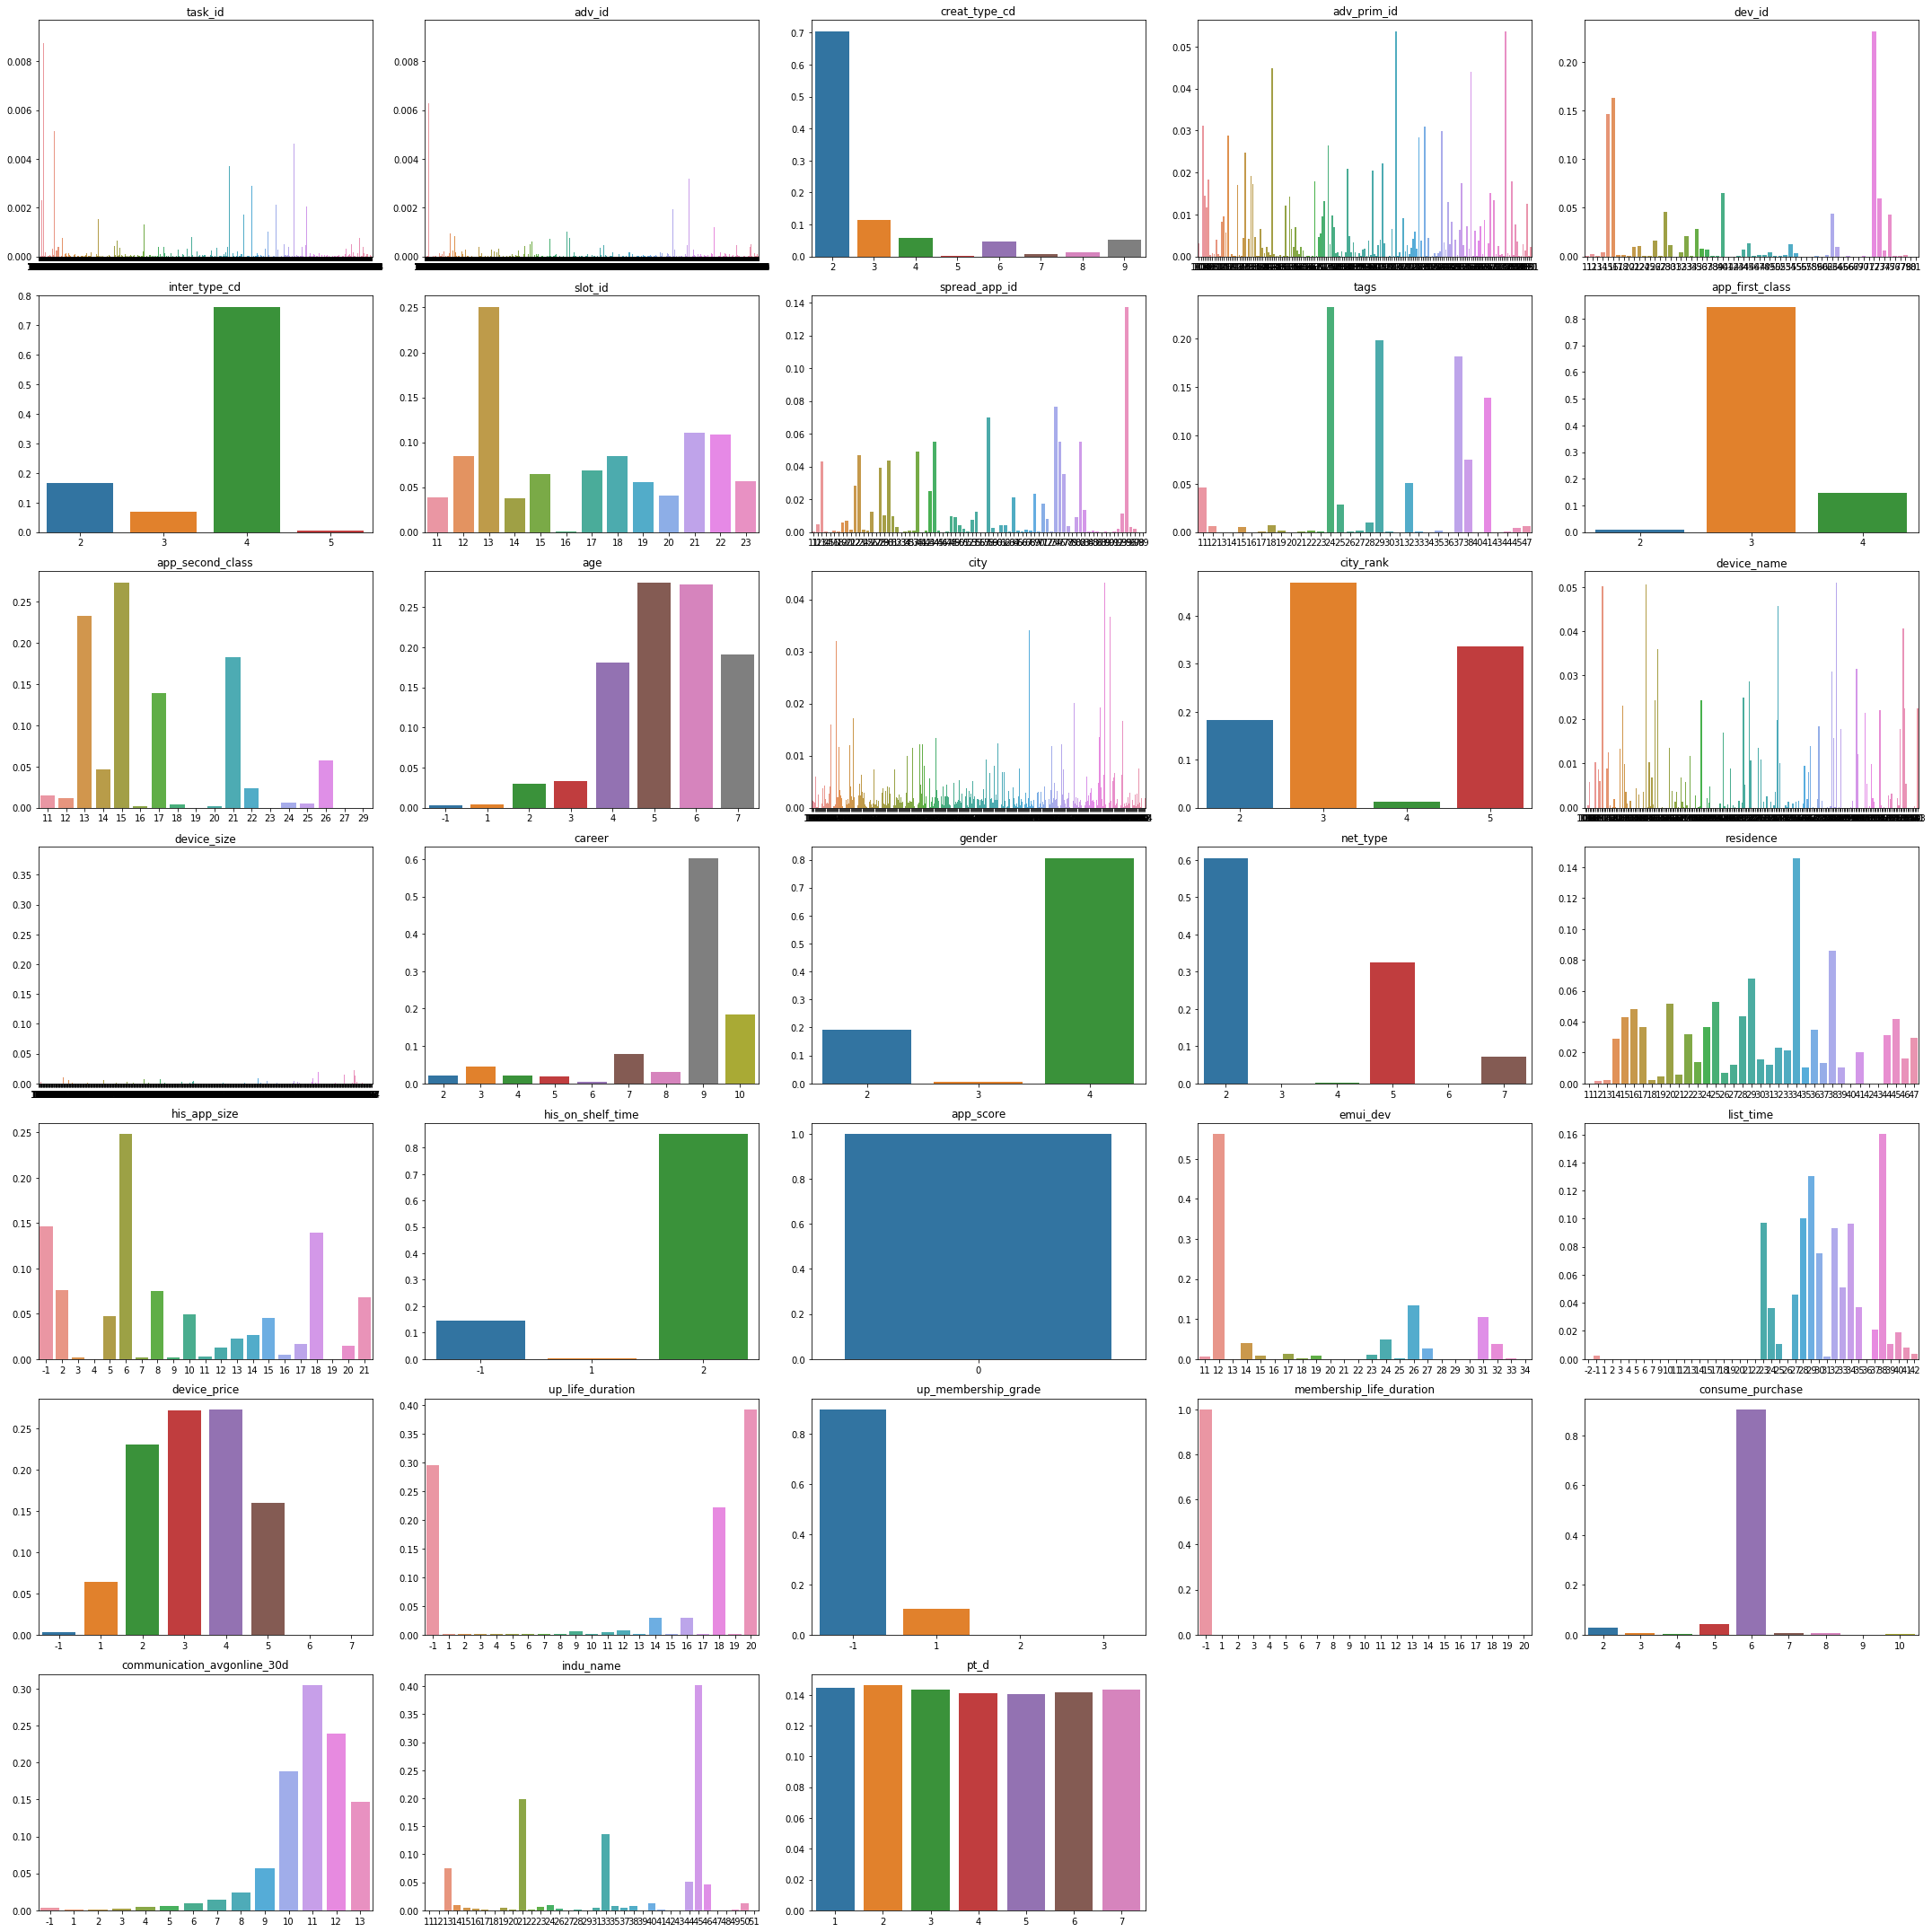

In [23]:
plt.figure(figsize=(30,30))
i = 1
for col in df_train.columns:
    if col in ['uid', 'label']:
        continue
    plt.subplot(7, 5, i)
    i += 1
    dis = df_train[col].value_counts() / df_train.shape[0]
    sns.barplot(x=dis.index, y=dis.values)
    plt.title(col)

plt.tight_layout()
plt.show()

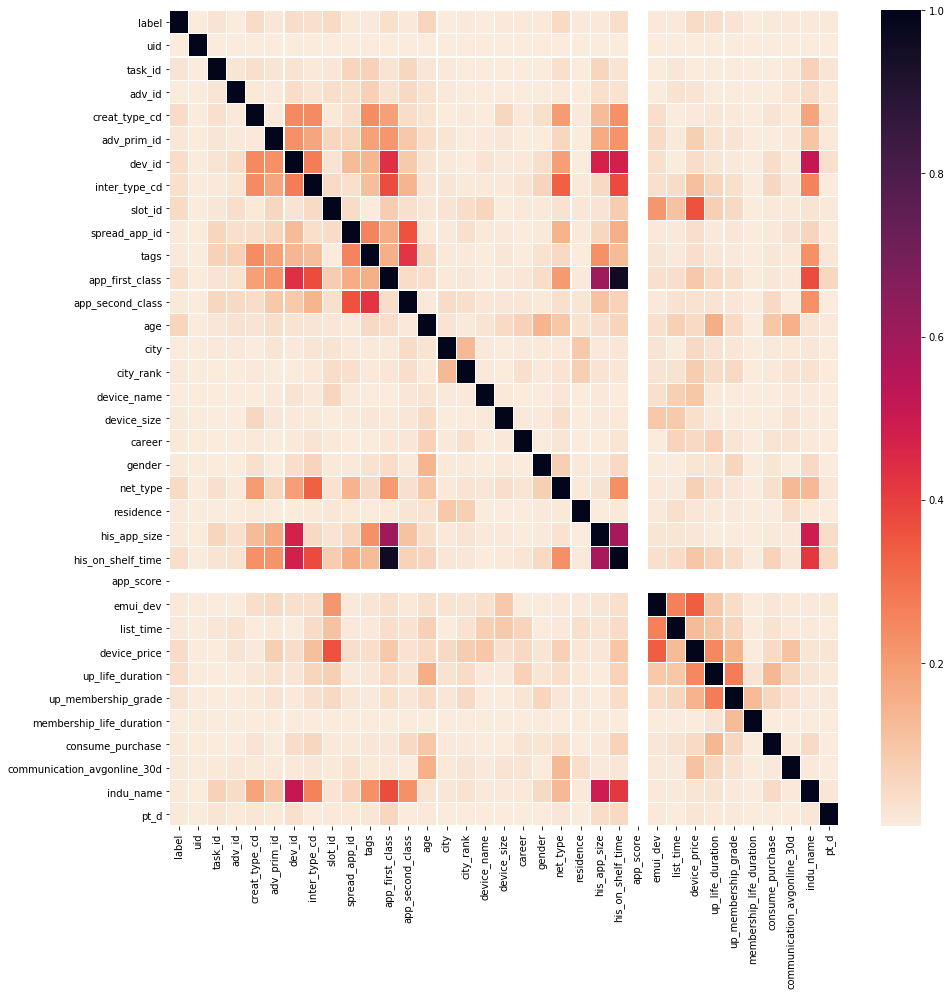

In [24]:
corr = abs(df_train.corr())
plt.figure(figsize=(15, 15))
sns.heatmap(corr, linewidths=0.1, cmap=sns.cm.rocket_r)